In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [3]:
file1.keys(filter_name='*')

['rec.crt_hits..length',
 'rec.crt_hits.pe',
 'rec.crt_hits.plane',
 'rec.crt_hits.position.x',
 'rec.crt_hits.position.y',
 'rec.crt_hits.position.z',
 'rec.crt_hits.position_err.x',
 'rec.crt_hits.position_err.y',
 'rec.crt_hits.position_err.z',
 'rec.crt_hits.t0',
 'rec.crt_hits.t1',
 'rec.crt_hits.time',
 'rec.crt_tracks..length',
 'rec.crt_tracks.hita.pe',
 'rec.crt_tracks.hita.plane',
 'rec.crt_tracks.hita.position.x',
 'rec.crt_tracks.hita.position.y',
 'rec.crt_tracks.hita.position.z',
 'rec.crt_tracks.hita.position_err.x',
 'rec.crt_tracks.hita.position_err.y',
 'rec.crt_tracks.hita.position_err.z',
 'rec.crt_tracks.hita.t0',
 'rec.crt_tracks.hita.t1',
 'rec.crt_tracks.hita.time',
 'rec.crt_tracks.hitb.pe',
 'rec.crt_tracks.hitb.plane',
 'rec.crt_tracks.hitb.position.x',
 'rec.crt_tracks.hitb.position.y',
 'rec.crt_tracks.hitb.position.z',
 'rec.crt_tracks.hitb.position_err.x',
 'rec.crt_tracks.hitb.position_err.y',
 'rec.crt_tracks.hitb.position_err.z',
 'rec.crt_tracks.hitb.

The ratio of Data/Mc is 1.3200671797669925


<Figure size 640x480 with 0 Axes>

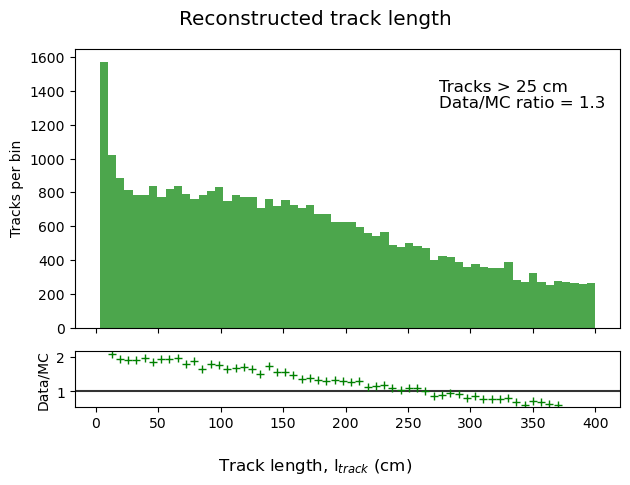

In [13]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.len'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_length= np.delete(reco_length, np.where((reco_length<3) | (reco_length>400)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
x_axis= bins[:-1]+bins[0]
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length[1:], bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('Reconstructed track length', size= 'x-large')
fig.supxlabel(r'Track length, l$_{track}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(275, 1400, 'Tracks > 25 cm', family='sans-serif', size= 'large')
ax1.text(275,1300, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 11.199501862600025


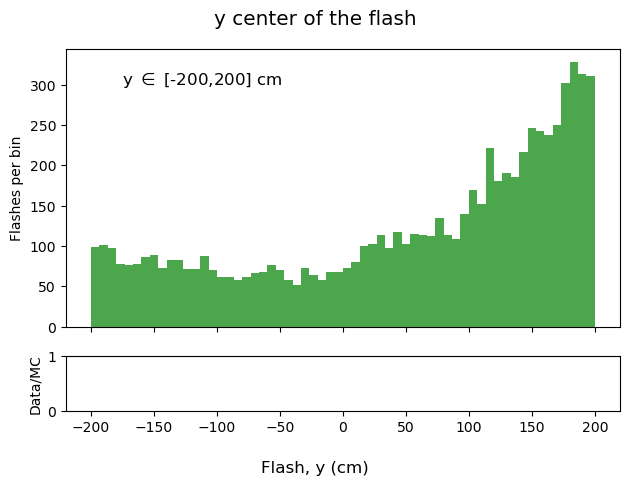

In [5]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.y'].array()).to_numpy()

# truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<-200) | (reco_flashy>200)))

# h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
# x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
# plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('y center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, y (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(-175, 300, r'y $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 3.512556277532667


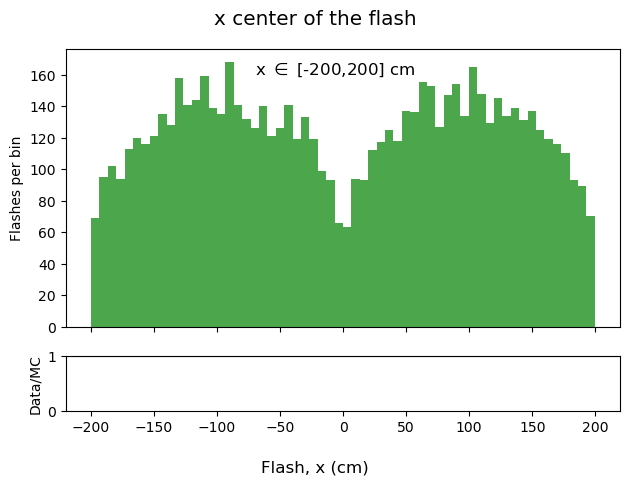

In [6]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.x'].array()).to_numpy()

# truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<-200) | (reco_flashy>200)))

# h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
# x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
# plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('x center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, x (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(-70, 160, r'x $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 0.27233751634997233


<Figure size 640x480 with 0 Axes>

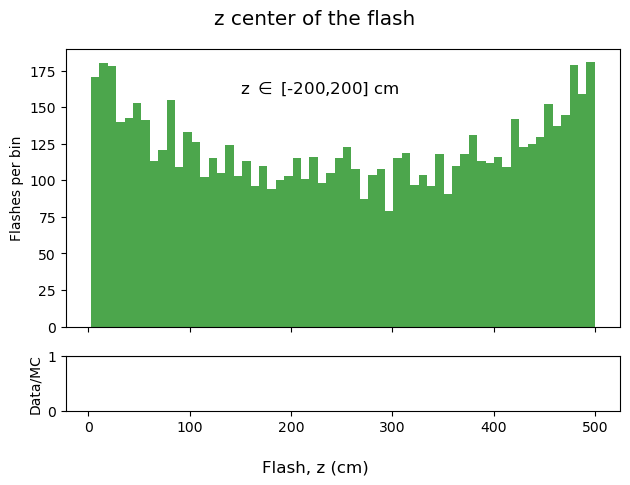

In [7]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.z'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<0) | (reco_flashy>500)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
x_axis= bins[:-1]+bins[0]
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('z center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, z (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(150, 160, r'z $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 1.2213189089281984


'rec.reco.trk.truth.p.end.x'

<Figure size 640x480 with 0 Axes>

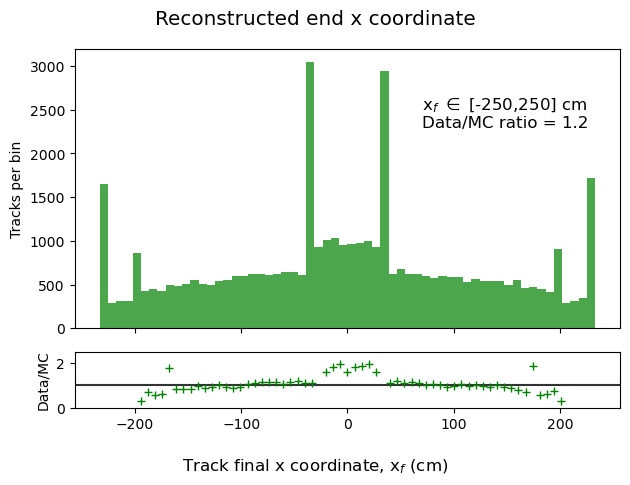

In [8]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.end.x'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.end.x'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<-250) | (truth_length>250)))
reco_length= np.delete(reco_length, np.where((reco_length<-250) | (reco_length>250)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length, bins=60, color= 'g', alpha= 0.7)
x_axis= bins[:-1]+ (bins[1]-bins[0])
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis, (h_reco/h_truth), fmt= 'g+')
fig.suptitle('Reconstructed end x coordinate', size= 'x-large')
fig.supxlabel(r'Track final x coordinate, x$_{f}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
ax2.set_ylim(0,2.5)
fig.tight_layout()
ax1.text(70, 2500,r'x$_f$ $\in$ [-250,250] cm', family='sans-serif', size= 'large')
ax1.text(70,2300, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
'rec.reco.trk.truth.p.end.x'

The ratio of Data/Mc is 1.6648778165464932


'rec.reco.trk.truth.p.end.x'

<Figure size 640x480 with 0 Axes>

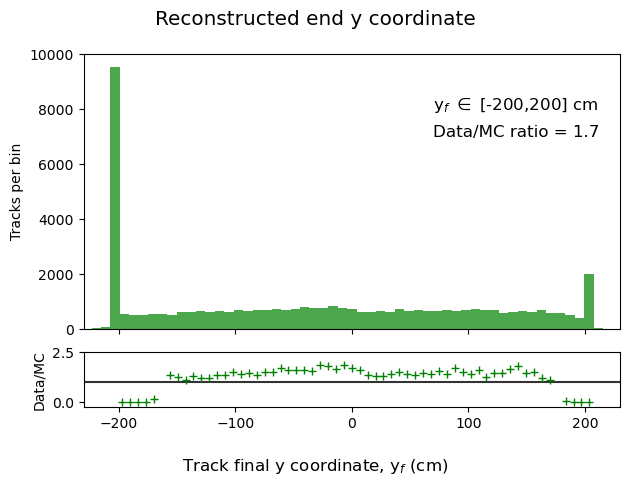

In [9]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.end.y'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.end.y'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<-250) | (truth_length>250)))
reco_length= np.delete(reco_length, np.where((reco_length<-250) | (reco_length>250)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length, bins=60, color= 'g', alpha= 0.7)
x_axis= bins[:-1]+ (bins[1]-bins[0])
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis, (h_reco/h_truth), fmt= 'g+')
fig.suptitle('Reconstructed end y coordinate', size= 'x-large')
fig.supxlabel(r'Track final y coordinate, y$_{f}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
ax2.set_ylim(-0.25,2.5)
ax2.set_xlim(-230,230)
fig.tight_layout()
ax1.text(70, 8000, r'y$_f$ $\in$ [-200,200] cm', family='sans-serif', size= 'large')
ax1.text(70,7000, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
'rec.reco.trk.truth.p.end.x'

The ratio of Data/Mc is 1.1346604327380598


'rec.reco.trk.truth.p.end.x'

<Figure size 640x480 with 0 Axes>

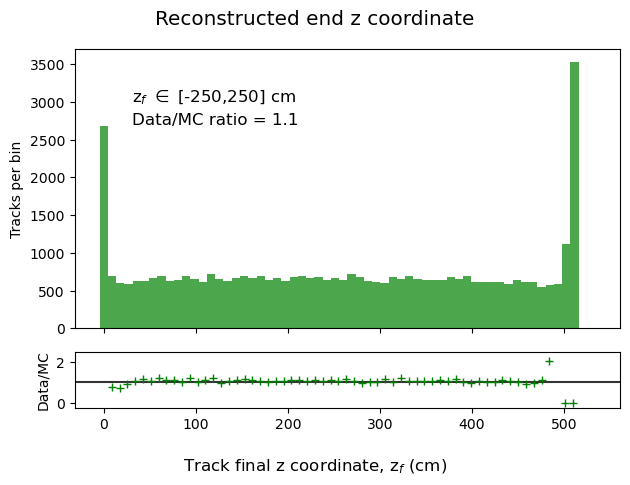

In [10]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.end.z'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.end.z'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<-5) | (truth_length>550)))
reco_length= np.delete(reco_length, np.where((reco_length<-5) | (reco_length>550)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length, bins=60, color= 'g', alpha= 0.7)
x_axis= bins[:-1]+ (bins[1]-bins[0])
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis, (h_reco/h_truth), fmt= 'g+')
fig.suptitle('Reconstructed end z coordinate', size= 'x-large')
fig.supxlabel(r'Track final z coordinate, z$_{f}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
ax2.set_ylim(-0.25,2.5)
fig.tight_layout()
ax1.text(30, 3000, r'z$_f$ $\in$ [-250,250] cm', family='sans-serif', size= 'large')
ax1.text(30,2700, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
'rec.reco.trk.truth.p.end.x'

The ratio of Data/Mc is 1.1346604327380598
[ 18.18699187   1.55228398 285.26470588   0.69887077]


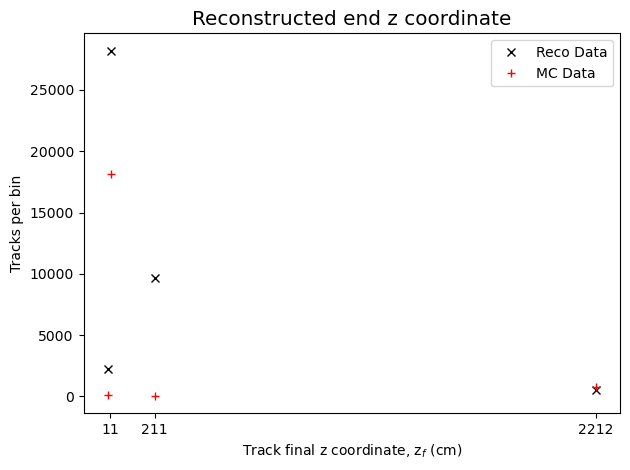

In [11]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.pdg'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.dazzle.pdg'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<0) | (truth_length>20000)))
reco_length= np.delete(reco_length, np.where((reco_length<0) | (reco_length>20000)))


reco_amount= np.unique(reco_length)
reco_num= np.array([np.count_nonzero(reco_length== i) for i in reco_amount])
truth_amount= np.unique(truth_length)
truth_num= np.array([np.count_nonzero(truth_length== i) for i in truth_amount])
plt.errorbar(reco_amount, reco_num, fmt='kx', label= 'Reco Data')
plt.xticks([11,211,2212])
plt.errorbar(reco_amount,np.delete(truth_num,2), fmt= 'r+', label= 'MC Data')
plt.title('Reconstructed end z coordinate', size= 'x-large')
plt.xlabel(r'Track final z coordinate, z$_{f}$ (cm)')
plt.ylabel('Tracks per bin')
plt.tight_layout()
plt.legend()
# ax1.text(1500, 25000, 'Tracks > 25 cm', family='sans-serif', size= 'large')
# ax1.text(1500,23000, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
print(reco_num/np.delete(truth_num,2))